# ÖDEV-4
Öğrenci Adı/Soyadı: **Arda Tan Göker**  
Öğrenci No: **1801022042**
***

## Ön hazırlık dosyasında verilen kodlar:

### OnCalismaOrnek7.pdf

In [24]:
# import the necessary libraries
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary
# the main package for signal processing is called "scipy" and we will use "signal"
import scipy.signal as sgnl
# alternative syntax: from scipy import signal as sgnl



In [25]:
z = np.array([0]) # a zero @z=0
p = np.array([1.0/4, 1.0/2]) # poles of the system
b, a = sgnl.zpk2tf(z, p, 1) # since there is no gain k=1
b, a

(array([1., 0.]), array([ 1.   , -0.75 ,  0.125]))

In [26]:
# alternative way to expand a product:
a = sgnl.convolve(np.array([1, -1/4]),np.array([1, -1/2]))
a

array([ 1.   , -0.75 ,  0.125])

In [27]:
# given the coeffs of numerator, i.e. b(z) and the coeffs of denominator a(z),
# we do the partial fraction expansion by:
r, p, k = sgnl.residuez(b,a)
r, p, k

# to check the correctness of the polynomial roots (i.e. p's) we can use
poless = np.roots(a) # returns the polynomial coefficients of the denominator

***
### OnCalismaOrnek8.pdf

In [28]:
# import the necessary libraries
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary
# the main package for signal processing is called "scipy" and we will use "signal"
import scipy.signal as sgnl
# alternative syntax: from scipy import signal as sgnl
%matplotlib inline

# !!!bu satır grafikler rahat okunsun diye eklendi!!!
plt.rcParams['figure.figsize'] = [7, 7]
# !!!bu satır grafikler rahat okunsun diye eklendi!!!

In [29]:
num = np.array([1,0,0]) # we add zeros to match the size of num and
denum = np.array([1, -3.0/4, 1.0/8]) # coeffs of denum
n, x = sgnl.dimpulse((num, denum, 1),x0=0, n=10)
x

(array([[1.        ],
        [0.75      ],
        [0.4375    ],
        [0.234375  ],
        [0.12109375],
        [0.06152344],
        [0.03100586],
        [0.01556396],
        [0.00779724],
        [0.00390244]]),)

***
### OnCalismaOrnek9.pdf

In [30]:
# import the necessary libraries
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary

# the main package for signal processing is called "scipy" and we will use "signal"
import scipy.signal as sgnl
# alternative syntax: from scipy import signal as sgnl

In [31]:
n = np.arange(0,10,1) # define the index vector for 10 points
xpf = -(1.0/4)**n + 2*(1.0/2)**n # result of Ornek-7

num = np.array([1, 0, 0]) # we add zeros to match the size of num an
denum = np.array([1, -3.0/4, 1.0/8]) # coeffs of denum

n1, xpse = sgnl.dimpulse((num, denum, 1),x0=0, n=10)
xpse = np.squeeze(xpse)

Text(0.5, 0, 'index vector (sample)')

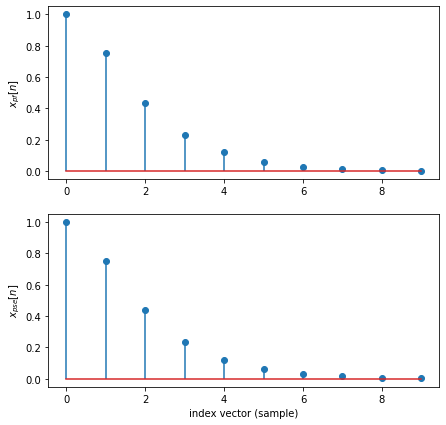

In [32]:
plt.subplot(2,1,1), plt.stem(n, xpf), plt.ylabel('$x_{pf}[n]$')
plt.subplot(2,1,2), plt.stem(n, xpse), plt.ylabel('$x_{pse}[n]$')
plt.xlabel('index vector (sample)')

***
### OnCalismaOrnek10.pdf

In [33]:
# import the necessary libraries
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary

# the main package for signal processing is called "scipy" and we will use "signal"
import scipy.signal as sgnl
# alternative syntax: from scipy import signal as sgnl


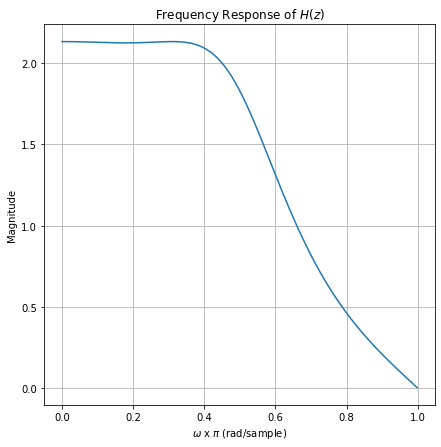

In [34]:
zeros = np.array([-1]) # observe that the numerator can be defined as transf
poles = np.array([1j/2, -1j/2, 1.0/4])

w, H = sgnl.freqz_zpk(zeros, poles, 1)

plt.plot(w/np.pi, abs(H)) # plot the magnitude in logarithmic scale with blue
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

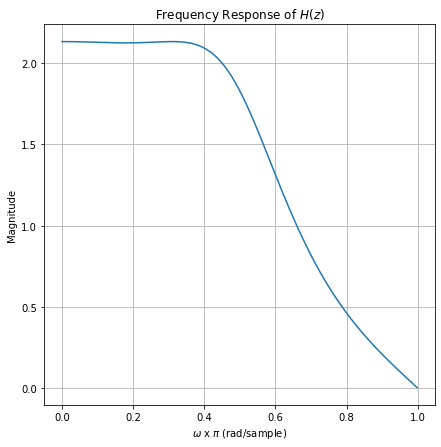

In [35]:
num, denum = sgnl.zpk2tf(zeros, poles, 1) # will return the coefficients b and a, r

w1, H_tf = sgnl.freqz(num, denum)

plt.figure()
plt.plot(w1/np.pi, abs(H_tf)) # plot the magnitude in logarithmic scale with b
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

<StemContainer object of 3 artists>

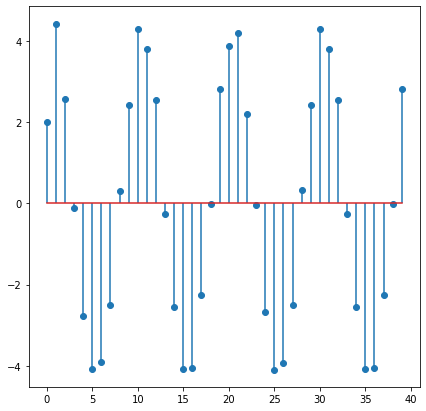

In [36]:
n = np.arange(0, 40, 1) # define the index vector
xn = 2*np.cos(0.2*np.pi*n) + np.sin(0.9*np.pi*n) # define the input signal
yn = sgnl.lfilter(num, denum, xn)
plt.figure()
plt.stem(n, yn)

***
### OnCalismaOrnek11.pdf

In [37]:
# import the necessary libraries
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary

# the main package for signal processing is called "scipy" and we will use "signal"
import scipy.signal as sgnl
# alternative syntax: from scipy import signal as sgnl

# WE NEED TO IMPORT THE CUSTOM (USER DEFINED) FUNCTION AS WELL, IN ORDER TO USE IT!!
import zplane

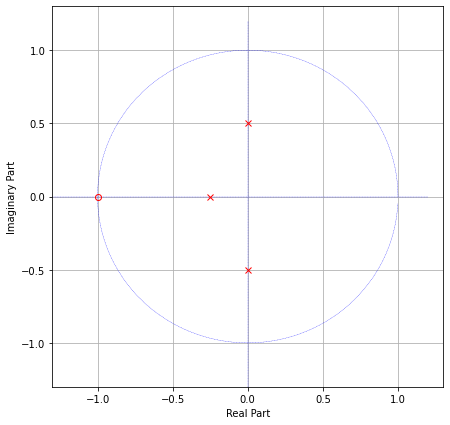

In [38]:
zeross = np.array([-1]) # the system has a single ze
poless = np.array([-1j/2, 1j/2, -1/4]) # the system has three poles
k = 1 # the system has unity gain

b, a = sgnl.zpk2tf(zeross,poless,k) # call the function that con

zplane.zplane(b,a) # call the function with coe

<Figure size 504x504 with 0 Axes>

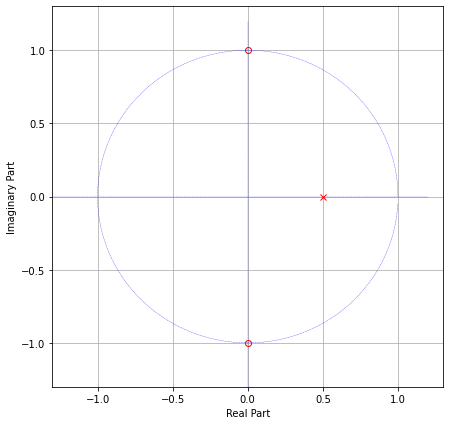

In [39]:
num = np.array([1, 0, 1]) # note that the coeff of z^(-1) term is zero.
denum = np.array([1, -1.0/2])

plt.figure()
zplane.zplane(num, denum)

Text(0.5, 0, '$\\omega$ x$\\pi$ rad/sample')

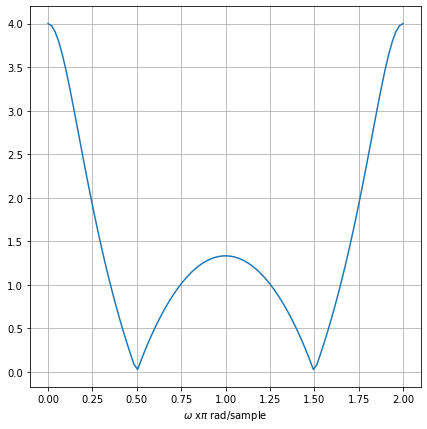

In [40]:
# Now, we define the frequency response as:
w = np.linspace(0, 2*np.pi, 100)

Hw = (1+np.exp(-2*1j*w))/(1-(1/2)*np.exp(-1j*w))
# alternatively, we could use the sgnl.freqz_zpk() function to calculate the Frequen
# or sgnl.freqz() function to calculate from the coefficients.

Hw_abs = abs(Hw)
plt.figure()
plt.plot(w/np.pi, Hw_abs)
plt.grid()
plt.xlabel('$\omega$ x$\pi$ rad/sample')

***

## Ödev soruları:
### SORU-1
**`a)`** Bize verilen fark denklemi'nin z transform u hesaplanınca, 
\begin{equation*}  Y(z)=\frac{1}2 Y(z)(z^{−1}) − 4Y(z)(z^{-2}) + 2Y(z)(z^{-3}) + X(z) + \frac{2}3 X(z)(z^{-1}) + \frac{1}9 X(z)(z^{-2}) \end{equation*}  
bulunuyor, `X[z]`'ler ve `Y[z]`'leri ayrı taraflara toplayıp sonrasında da `Y[z]/X[z]` olacak şekilde düzenlersek `H[z]` sistem fonksiyonunu elde ediyoruz;  
\begin{equation*} H(z)= \frac{Y(z)}{X(z)} =\frac{1+ \frac{2}3 z^{-1} + \frac{1}9 z^{-2}}{ 1 -\frac{1}2 z^{−1} + 4 z^{-2} - 2 z^{-3}} \end{equation*} 

\begin{equation*} H(z)=\frac{(1+\frac{1}{3}z^{-1})(1+\frac{1}{3}z^{-1})}{(1+4z^{-2})(1-\frac{1}{2}z^{-1})} \end{equation*} 


**`b)`**

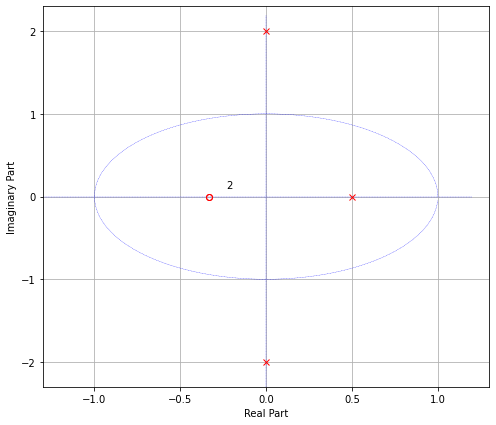

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import zplane
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 7]

zeros = np.array([1, 2/3, 1/9])
poles = np.array([1, -1/2, 4, -2])

zplane.zplane(zeros, poles)



**`c1)`** eğer `ℎ[𝑛] = 0, 𝑛 < 0`  

Bu sistemin nedensel olma koşulu olup nedensel sistemler sağ yanlıdır. Bu da ROC bölgesinin içinde kutup barındıramayacağı anlamına gelir. Böylece en dış kutuptan itibaren ROC bölgesi seçilmesi gerekmektdir. Sınırlar `|z| > 2` çıkar

**`c2)`** eğer sistemin `Fourier Dönüşümü varsa`  

Sistemin fourier dönüşümü olması sistemin kararlı olduğunu gösterir, ayrıca kararlı sistemlerde ROC birim çemberi kapsar ama kutup içermez. Bu yüzden iki sınırlaycı faktör çıkar.
Sınırlar `0.5 < |z| < 2` çıkar.



**`d)`**

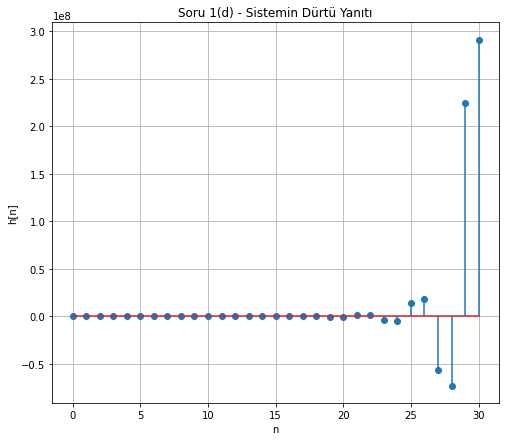

In [42]:
n, x = sig.dimpulse((zeros, poles, 1), x0=0, n=31) 
#yukarıda zaten var olan num ve denum değerleri

plt.figure()
plt.stem(n, np.squeeze(x))
plt.title('Soru 1(d) - Sistemin Dürtü Yanıtı')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid()

Bu dürtü yanıtından sistemin `nedensel` fakat `kararlı olmadığını` görüyoruz çünkü mutlak toplam sonlu bir sayıya değil sonsuza yakınsıyor.

**`e)`**  

C şıkkında açıkladığımız gibi hem `|z| > 2` hem de `0.5 < |z| < 2` aynı anda geçerli olamadğı için hem kararlı hem de nedensel olması mümkün değildir, Bunun sağlanması için hem birim çemberi içermeli hem de sağ yanlı olmalıdır. Bunu da sadece `0.5 < |z|` sağlar.  

Ama ROC içinde kutup bulunduramayacağı için `2j` ve `-2j` kutuplarını içermemesi lazım. Sistem fonksiyonundaki bu değerleri sağlayan kısımdan kurtulmamız gerekiyor.

\begin{equation*} H(z)=\frac{(1+\frac{1}{3}z^{-1})(1+\frac{1}{3}z^{-1})}{(1+4z^{-2})(1-\frac{1}{2}z^{-1})} \end{equation*}

burada paydadaki kompleks kökleri veren `(1+4z^-2)` i yok etmek için `H(z)` yi `(1+4z^-2)` ile çarparsak,

\begin{equation*} H(Z)=\frac{(1+\frac{1}{3}z^{-1})(1+\frac{1}{3}z^{-1})}{(1-\frac{1}{2}z^{-1})}\end{equation*}
\begin{equation*} H(z)=\frac{1+ \frac{2}3 z^{-1} + \frac{1}9 z^{-2}}{1-\frac{1}{2}z^{-1}} \end{equation*} 

denklemini elde ederiz.

**`f)`**  

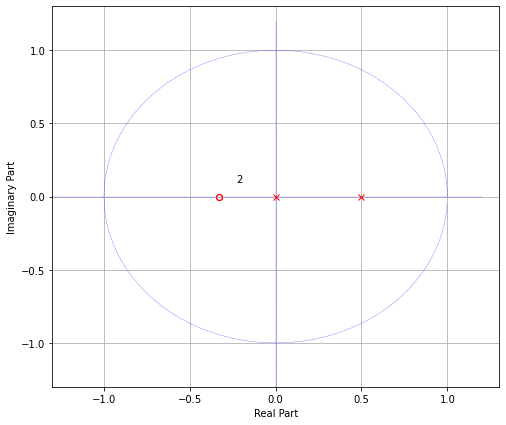

In [43]:
zeros = np.array([1, 2.0/3, 1.0/9])
poles = np.array([1, -1.0/2, 0])

zplane.zplane(zeros, poles)

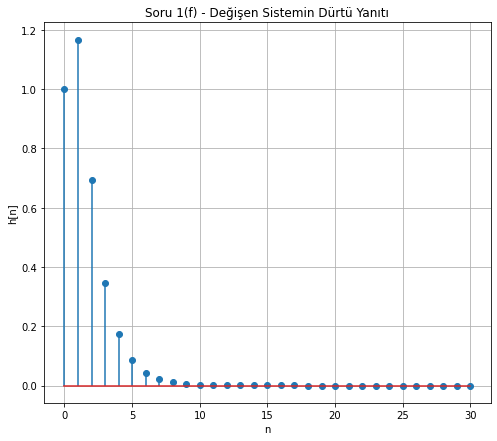

In [44]:
n, x = sig.dimpulse((zeros, poles, 1), x0=0, n=31)

plt.figure()
plt.stem(n, np.squeeze(x))
plt.title('Soru 1(f) - Değişen Sistemin Dürtü Yanıtı')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid()

***
### SORU-2  

\begin{equation*} H\left(z\right)=\frac{z^2}{\left(z+1\right)\left(z-1\right)^2}\end{equation*}

\begin{equation*} H\left(z\right)=\frac{A}{\left(z+1\right)}+\frac{B}{\left(z-1\right)}+\frac{C}{\left(z-1\right)^2} \end{equation*}

Elle yapılan hesaplamalar sonucu, `A = 1/4`, `B = 3/4`, `C = 1/2` çıkmıştır. Ters dönüşümler alınınca dürtü yanıtı aşağıdaki gibi bulundu.

\begin{equation*} h\left[n\right]=\frac{1}{4}\left(-1\right)^{n-1}u\left[n-1\right]+\frac{3}{4}u\left[n-1\right]+\frac{1}{2}\left(n-1\right)u\left[n-1\right] \end{equation*}

Text(0, 0.5, 'h[n]')

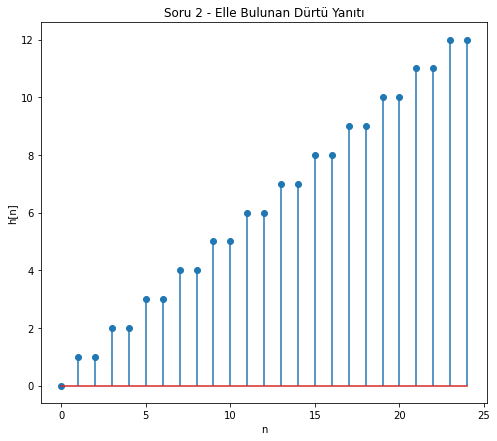

In [45]:
n = np.arange(0, 25, 1)
h = (1/4)*(-1.0)**(n-1)*np.heaviside(n, 1) + (3/4)*np.heaviside(n, 1) + (1/2)*(n-1)*np.heaviside(n, 1)

plt.figure()
plt.stem(n, h)
plt.title('Soru 2 - Elle Bulunan Dürtü Yanıtı')
plt.xlabel('n')
plt.ylabel('h[n]')



Text(0.5, 0, 'n')

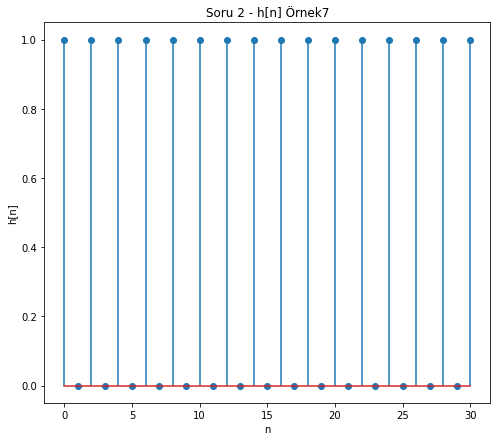

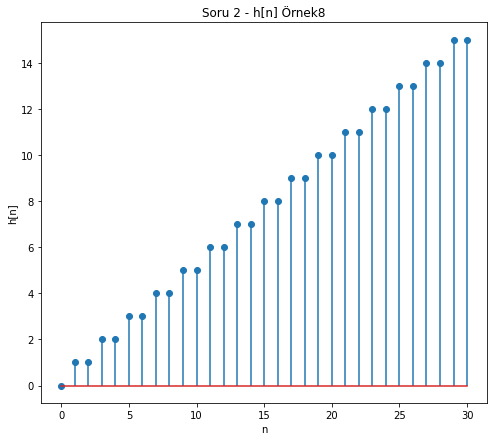

In [46]:
zeros = np.array([0, 0])
poles = np.array([-1, 1, 1])
b, a = sig.zpk2tf(zeros, poles, 1)
r, p, k = sig.residuez(b,a)

n = np.arange(0, 31, 1)
h_o7 = 1/2*((-1.0)**n) + 1/2
n, h_o8 = sig.dimpulse((b, a, 1), x0=0, n=31)
plt.figure(2)
plt.stem(n, h_o7, use_line_collection=True)
plt.title('Soru 2 - h[n] Örnek7')
plt.ylabel('h[n]')
plt.xlabel('n')

plt.figure(3)
plt.stem(n, np.squeeze(h_o8), use_line_collection=True)
plt.title('Soru 2 - h[n] Örnek8')
plt.ylabel('h[n]')
plt.xlabel('n')